In [19]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
%matplotlib inline
from mpl_toolkits.mplot3d.axes3d import *


# resource: https://astrogeology.usgs.gov/search/map/Moon/LMMP/Apollo15/LRO_NAC_DEM_Apollo_15_26N004E_150cmp
# Height (Elevation m) = DN; Planetary Radius = DN + 1737400m
Image.MAX_IMAGE_PIXELS = None
dem_path = '../dataset/LRO_NAC_DEM_Apollo_15_26N004E_150cmp.tif'


img = Image.open(dem_path)
img = np.asarray(img, dtype=np.float16)
width,height = img.shape[0],img.shape[1]
mid_x,mid_y = int(width/2)-1500,int(height/2)-1500
crop_height, crop_width = 1000,1000
img = img[mid_x:mid_x+crop_width,mid_y:mid_y+crop_height]
img = img - np.mean(img)

In [2]:
img

array([[-1., -1., -1., ...,  2.,  2.,  2.],
       [ 0., -1., -1., ...,  2.,  2.,  2.],
       [ 0.,  0., -1., ...,  2.,  2.,  2.],
       ...,
       [-7., -6., -6., ...,  0.,  0.,  0.],
       [-6., -6., -6., ...,  0.,  0.,  0.],
       [-6., -6., -6., ...,  0.,  0.,  0.]], dtype=float16)

C:\Users\kafra\AppData\Local\Temp/ipykernel_27788/1352539156.py:11: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


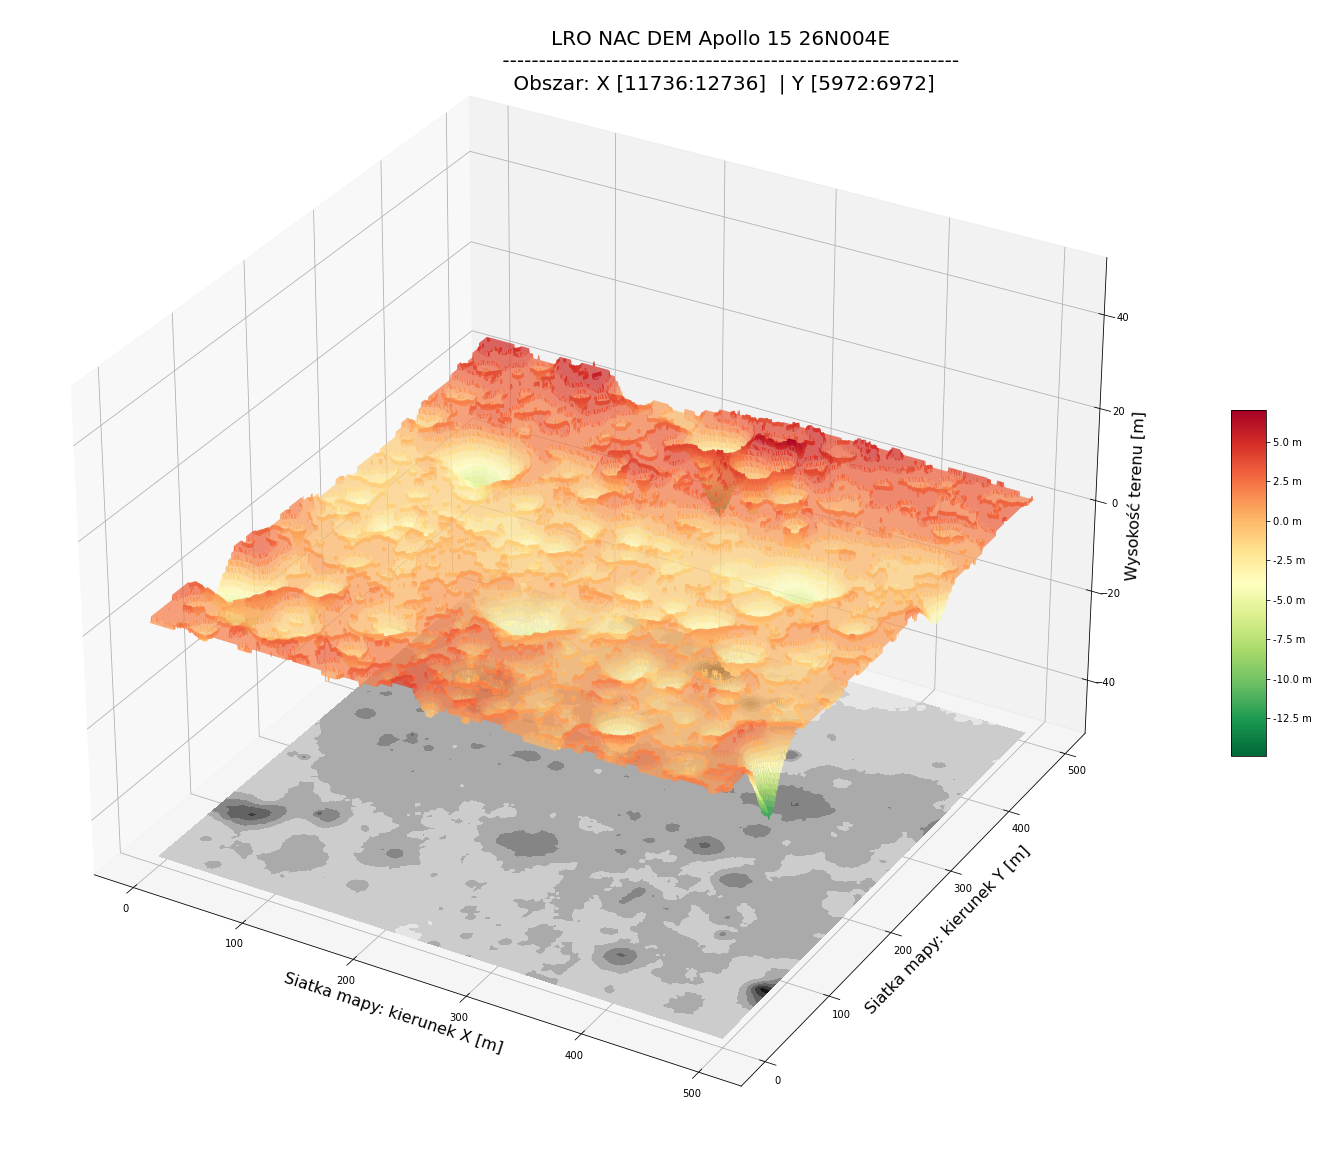

In [59]:
#from matplotlib.mlab import griddata

def plot_mesh(img, export_img=False):
    xi = np.arange(0, img.shape[0],1) * 0.5 # Grid in meters
    yi = np.arange(0, img.shape[1],1) * 0.5 # Grid in meters
    z = img.flatten() # Height in meters
    Z = img
    X, Y = np.meshgrid(xi, yi)

    fig = plt.figure(figsize=(20,16))
    ax = Axes3D(fig)
  #  ax.scatter3D(X,Y,z,c=z,cmap=plt.cm.jet)  

    my_cmap = plt.cm.RdYlGn_r
    surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap=my_cmap,
                       linewidth=0, antialiased=True)
    fig.colorbar(surf, ax = ax,
             shrink = 0.3,
             aspect = 10,
             format="%.1f m")
    
    cset = ax.contourf(X, Y, Z,
                   zdir ='z',
                   offset = -50,
                   cmap = 'Greys_r')
    fig.suptitle('LRO NAC DEM Apollo 15 26N004E  \n ---------------------------------------------------------------\n Obszar: X [{}:{}]  | Y [{}:{}]  '.format(
        mid_x,mid_x+crop_width,mid_y,mid_y+crop_height), fontsize=20)

    ax.set_xlabel('Siatka mapy: kierunek X [m]', fontsize = 16)
    ax.set_ylabel('Siatka mapy: kierunek Y [m]', fontsize = 16)
    ax.set_zlabel('Wysokość terenu [m]', fontsize = 16)

    ax.set_zlim(-50, 50)
    if export_img:
        plt.savefig('../dataset/DEM_plot.jpg', )
    plt.show()
    

plot_mesh(img, False)